***
# Data Analyst - _Oluwatoyin Egunjobi_

  "_This data analysis project is driven by my Nobel Prize aspirations_"
***

***
# Inspiration:

- _Which country has won the most prizes in each category?_
- _How many males and females has won the prizes?_
- _Which organization has won the most prizes?_
- _Youngest and Oldest winners?_

***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
noble = pd.read_csv("nobel_laureates_data.csv")
noble.head()

,year,category,motivation,prizeShare,laureateID,fullName,gender,born,bornCountry,bornCity,died,diedCountry,diedCity,organizationName,organizationCountry,organizationCity
0,2023,medicine,for their discoveries concerning nucleoside ba...,2,1024,Katalin Kariko,female,17-01-1955,Hungary,Szolnok,0000-00-00,NaN,NaN,Szeged University,Hungary,Szeged
1,2023,economics,for having advanced our understanding of women...,1,1034,Claudia Goldin,female,1946-00-00,USA,New York NY,0000-00-00,NaN,NaN,Harvard University,USA,Cambridge MA
2,2023,peace,for her fight against the oppression of women ...,1,1033,Narges Mohammadi,female,21-04-1972,Iran,Zanjan,0000-00-00,NaN,NaN,NaN,NaN,NaN
3,2023,literature,for his innovative plays and prose which give ...,1,1032,Jon Fosse,male,29-09-1959,Norway,Haugesund,0000-00-00,NaN,NaN,NaN,NaN,NaN
4,2023,chemistry,for the discovery and synthesis of quantum dots,3,1031,Alexei Ekimov,male,1945-00-00,Russia,NaN,0000-00-00,NaN,NaN,Nanocrystals Technology Inc.,USA,New York NY


In [3]:
noble.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   year                 1000 non-null   int64 
 1   category             1000 non-null   object
 2   motivation           1000 non-null   object
 3   prizeShare           1000 non-null   int64 
 4   laureateID           1000 non-null   int64 
 5   fullName             1000 non-null   object
 6   gender               1000 non-null   object
 7   born                 1000 non-null   object
 8   bornCountry          970 non-null    object
 9   bornCity             966 non-null    object
 10  died                 970 non-null    object
 11  diedCountry          652 non-null    object
 12  diedCity             646 non-null    object
 13  organizationName     736 non-null    object
 14  organizationCountry  733 non-null    object
 15  organizationCity     731 non-null    object
dtypes: int6

***
# TRANSFORMING THE DATA
***

In [4]:
noble.columns.str.title()

Index(['Year', 'Category', 'Motivation', 'Prizeshare', 'Laureateid',
       'Fullname', 'Gender', 'Born', 'Borncountry', 'Borncity', 'Died',
       'Diedcountry', 'Diedcity', 'Organizationname', 'Organizationcountry',
       'Organizationcity'],
      dtype='object')

In [5]:
# Assigning the transformed column headers to the data
noble = pd.read_csv("nobel_laureates_data.csv")
noble.columns = noble.columns.str.title()
noble.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Year                 1000 non-null   int64 
 1   Category             1000 non-null   object
 2   Motivation           1000 non-null   object
 3   Prizeshare           1000 non-null   int64 
 4   Laureateid           1000 non-null   int64 
 5   Fullname             1000 non-null   object
 6   Gender               1000 non-null   object
 7   Born                 1000 non-null   object
 8   Borncountry          970 non-null    object
 9   Borncity             966 non-null    object
 10  Died                 970 non-null    object
 11  Diedcountry          652 non-null    object
 12  Diedcity             646 non-null    object
 13  Organizationname     736 non-null    object
 14  Organizationcountry  733 non-null    object
 15  Organizationcity     731 non-null    object
dtypes: int6

In [6]:
# Manualing renaming some specific columns that has 2 words together for readability.
noble.rename(columns={
    'Prizeshare': 'Prize_share',
    'Laureateid': 'Laureate_id',
    'Fullname': 'Full_name',
    'Borncountry': 'Born_country',
    'Borncity': 'Born_city',
    'Diedcountry': 'Died_country',
    'Diedcity': 'Died_city',
    'Organizationname': 'Organization_name',
    'Organizationcountry': 'Organization_country',
    'Organizationcity': 'Organization_city'
}, inplace=True)
noble.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Year                  1000 non-null   int64 
 1   Category              1000 non-null   object
 2   Motivation            1000 non-null   object
 3   Prize_share           1000 non-null   int64 
 4   Laureate_id           1000 non-null   int64 
 5   Full_name             1000 non-null   object
 6   Gender                1000 non-null   object
 7   Born                  1000 non-null   object
 8   Born_country          970 non-null    object
 9   Born_city             966 non-null    object
 10  Died                  970 non-null    object
 11  Died_country          652 non-null    object
 12  Died_city             646 non-null    object
 13  Organization_name     736 non-null    object
 14  Organization_country  733 non-null    object
 15  Organization_city     731 non-null    o

***
# Analysis 1: _Which country has won the most prizes in each category?_
***

In [7]:
# Checking countries and their prizes count.
noble_country_category_counts = noble.groupby(['Category', 'Born_country']).size().reset_index(name='Prize_count')

# Finding the country with the most prizes in each category
noble_most_prizes_by_category = noble_country_category_counts.loc[
                                noble_country_category_counts.groupby('Category')['Prize_count'].idxmax()
]

noble_most_prizes_by_category

,Category,Born_country,Prize_count
34,chemistry,USA,58
56,economics,USA,54
72,literature,France,12
140,medicine,USA,80
188,peace,USA,19
222,physics,USA,71


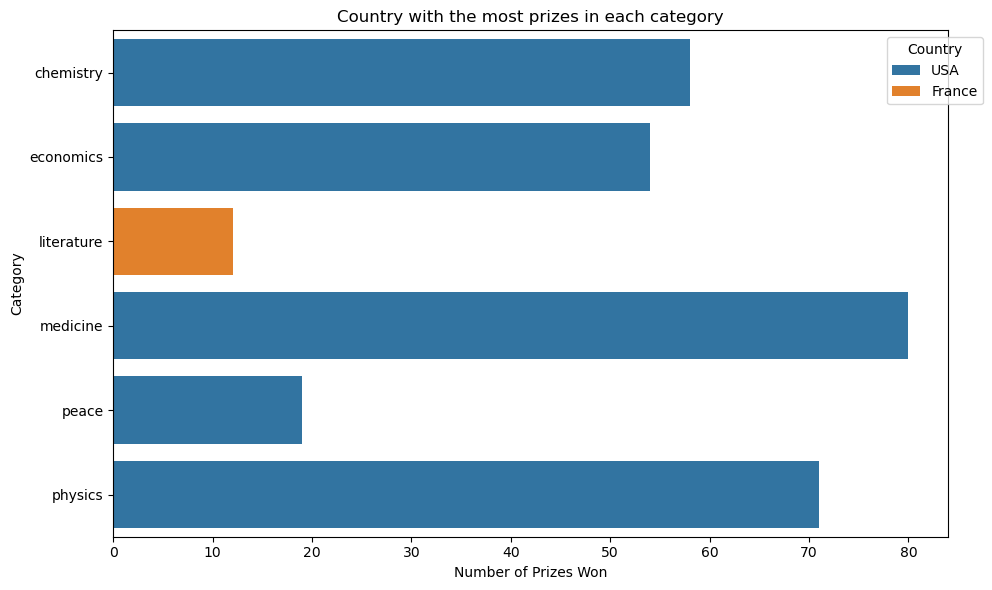

In [8]:
# A Chart for better visualization
plt.figure(figsize=(10, 6)) 
sns.barplot(data=noble_most_prizes_by_category, y='Category', x='Prize_count', hue='Born_country') 
plt.title('Country with the most prizes in each category') 
plt.xlabel('Number of Prizes Won') 
plt.legend(title='Country', bbox_to_anchor=(1.05, 1)) 
plt.tight_layout() 
plt.show()

***
# Analysis 2: _How many males, females and organizations has won the prizes?_
***

In [9]:
noble_counts = noble['Gender'].value_counts()
noble_counts

Gender
male      905
female     65
org        30
Name: count, dtype: int64

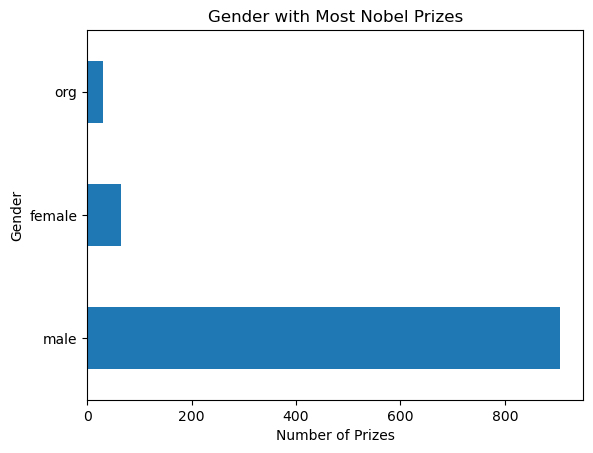

In [10]:
noble_counts.plot(kind='barh')
plt.title('Gender with Most Nobel Prizes')
plt.xlabel('Number of Prizes')
plt.show()


***
# Analysis 3: _Which organization has won the most prizes?_
***

In [11]:
# Count prizes per organization
noble['Organization_name'].value_counts()

noble_organization_counts = noble['Organization_name'].value_counts().head(5)

print("\nOrganization and their prize counts: \n")
print(noble_organization_counts)


Organization and their prize counts: 

Organization_name
University of California                       36
Harvard University                             28
Massachusetts Institute of Technology (MIT)    22
Stanford University                            22
University of Chicago                          19
Name: count, dtype: int64


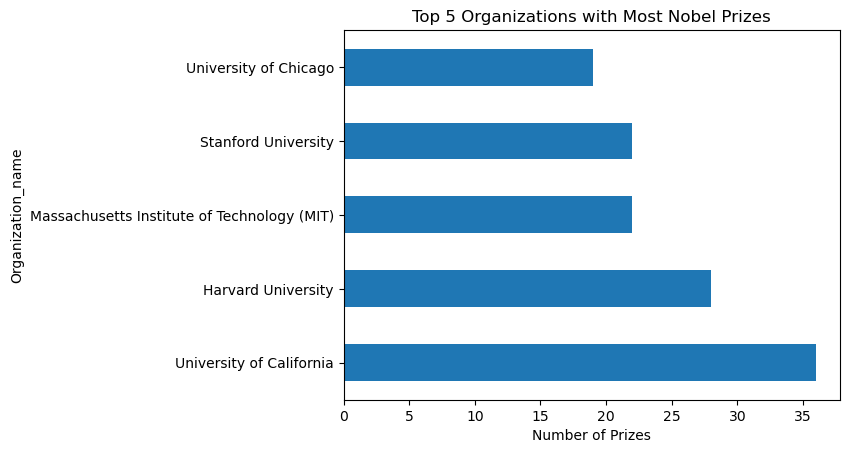

In [12]:
# Creating a bar chart for visualization
noble_organization_counts.plot(kind='barh')
plt.title('Top 5 Organizations with Most Nobel Prizes')
plt.xlabel('Number of Prizes')
plt.show()


***
# Analysis 4: _Youngest And Oldest Noble Prize Winners_
***

In [13]:
# Convert Born column to datetime and extract the year for my analysis
noble['Born'] = pd.to_datetime(noble['Born'], dayfirst=True, errors='coerce')
noble['Birth_year'] = noble['Born'].dt.year.astype('Int64')

# Calculating age at the time of award
noble['Age_at_award'] = noble['Year'] - noble['Birth_year']

# Removing rows where age couldn't be calculated
noble_with_age = noble[noble['Age_at_award'].notna()].copy()

# Finding the youngest winner
youngest_noble = noble_with_age.loc[noble_with_age['Age_at_award'].idxmin()]
print("YOUNGEST NOBLE PRIZE WINNER: \n")
print(f"Name: {youngest_noble['Full_name']}")
print(f"Age: {int(youngest_noble['Age_at_award'])}")
print(f"Year: {int(youngest_noble['Year'])}")
print(f"Category: {youngest_noble['Category']}")
print(f"Motivation: {youngest_noble['Motivation']}")

print("\n" + "="*100 + "\n")


# Finding the oldest winner
oldest_noble = noble_with_age.loc[noble_with_age['Age_at_award'].idxmax()]
print("OLDEST NOBLE PRIZE WINNER: \n")
print(f"Name: {oldest_noble['Full_name']}")
print(f"Age: {int(oldest_noble['Age_at_award'])}")
print(f"Year: {int(oldest_noble['Year'])}")
print(f"Category: {oldest_noble['Category']}")
print(f"Motivation: {oldest_noble['Motivation']}")

YOUNGEST NOBLE PRIZE WINNER: 

Name: National Dialogue Quartet 
Age: 2
Year: 2015
Category: peace
Motivation: for its decisive contribution to the building of a pluralistic democracy in Tunisia in the wake of the Jasmine Revolution of 2011


OLDEST NOBLE PRIZE WINNER: 

Name: John Goodenough
Age: 97
Year: 2019
Category: chemistry
Motivation: for the development of lithium-ion batteries
